In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# Zad
Na danych datasets wykonaj wykonaj LinearRegression w następujących krokach:

* podział na train test
* wykonaj skalowanie
* wykonaj PCA i wyznacz optymalną ilość komponentów
* naucz model
    * Naucz model na wszystkich współrzędnych 
    * Naucz model na zredukowanej ilości współrzędnych
    * porównaj wyniki


In [7]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

In [8]:
X = boston.data
y = boston.target
print(X.shape)

(506, 13)


In [9]:
from sklearn.model_selection import train_test_split
seed=12

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
X_train.shape

(455, 13)

In [10]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5, random_state=seed)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [11]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# learning an LR on the scaled training data
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn import  metrics
# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled),y_true = y_test)) )
gl_r2 = metrics.r2_score( y_pred = lr.predict(X_test_scaled),y_true = y_test)

Scaled test set R2: 0.79


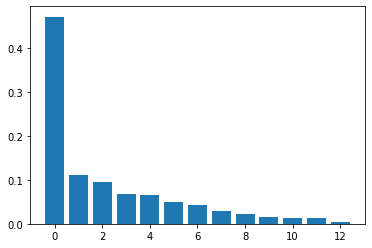

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

lr = LinearRegression()
# learning an LR on the scaled training data
lr.fit(X_train_scaled_pca, y_train)

# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled_pca),y_true = y_test)) )

Scaled test set R2: 0.68


# Zad

Wykonaj powyższe zadanie z wykorzystaniem 

```python 
from sklearn.pipeline import Pipeline
```

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(n_components=3)),
    ("LR", LinearRegression())    
])

In [17]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('LR',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [18]:
# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) )

Scaled test set R2: 0.68


# Zad

Narysuj zależność ilości wymiarów i miary R2 dla

```python
n_components = [2,3,4,5,6,7,8,9,10,11]
```

In [19]:
r2_array = []
for i in range(1,X.shape[1]):
    print(i)
    pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR", LinearRegression())    
    ])
    pipe.fit(X_train, y_train)
    # scoring on the scaled test set
    r2_array.append( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) 

1
2
3
4
5
6
7
8
9
10
11
12


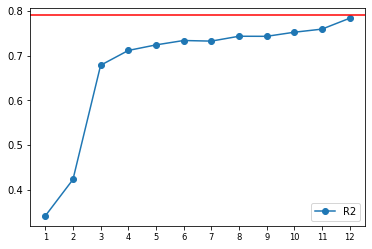

In [20]:
t=range(1,X.shape[1])

plt.plot(r2_array, "o-", label="R2")
plt.xticks(range(len(t)), t, size='small', label="R2")
plt.axhline(y=gl_r2, color='r', linestyle='-')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.
Sprawdź
```python
n_components = [2,3,4,5,6,7,8,9,10]
```

In [21]:
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR", LinearRegression())    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 7)}



In [22]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'pca__n_components': 6, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.73


Best parameters:  {'pca__n_components': 6, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.73


# Zad

In [62]:
from sklearn.svm import SVR
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=2)),
        ("SVR", SVR(kernel='rbf', gamma=0.1))    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 5),
            "SVR__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
            "SVR__gamma": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [63]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=2, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('SVR',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=...
                                            verbose=False))],
                     

In [64]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'SVR__C': 1000, 'SVR__gamma': 0.01, 'pca__n_components': 4, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.85


In [136]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=2)),
        ("RF", RandomForestRegressor())    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 5),
            'RF__n_estimators': [70, 200, 700, 800],
            'RF__max_depth':  [100, 170, 200],
            'RF__max_features': ['log2','sqrt','auto'],
            'RF__max_leaf_nodes':  [100, 200],
             }

In [137]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_fea...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4]), 'RF__n_estimators': [70, 200, 700, 800], 'RF__max_depth': [100, 170, 200], 'RF__max_features': ['log2', 'sqrt', 'auto'], 'RF__max_leaf_nodes': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'RF__max_depth': 170, 'RF__max_features': 'sqrt', 'RF__max_leaf_nodes': 100, 'RF__n_estimators': 700, 'pca__n_components': 4, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Best test R2: 0.55
